# 非線性分割SVM測試
### 程式修改自[Scikit-learn SVM-Kernels](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py)

## 載入相關套件

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

## 生成隨機資料

In [5]:
# 16筆資料，分兩類
X = np.c_[
    (0.4, -0.7),
    (-1.5, -1),
    (-1.4, -0.9),
    (-1.3, -1.2),
    (-1.1, -0.2),
    (-1.2, -0.4),
    (-0.5, 1.2),
    (-1.5, 2.1),
    (1, 1),
    (1.3, 0.8),
    (1.2, 0.5),
    (0.2, -2),
    (0.5, -2.4),
    (0.2, -2.3),
    (0, -2.7),
    (1.3, 2.1),
].T
Y = [0] * 8 + [1] * 8

In [6]:
X, Y

(array([[ 0.4, -0.7],
        [-1.5, -1. ],
        [-1.4, -0.9],
        [-1.3, -1.2],
        [-1.1, -0.2],
        [-1.2, -0.4],
        [-0.5,  1.2],
        [-1.5,  2.1],
        [ 1. ,  1. ],
        [ 1.3,  0.8],
        [ 1.2,  0.5],
        [ 0.2, -2. ],
        [ 0.5, -2.4],
        [ 0.2, -2.3],
        [ 0. , -2.7],
        [ 1.3,  2.1]]),
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

## 繪圖比較三種 kernels 模型

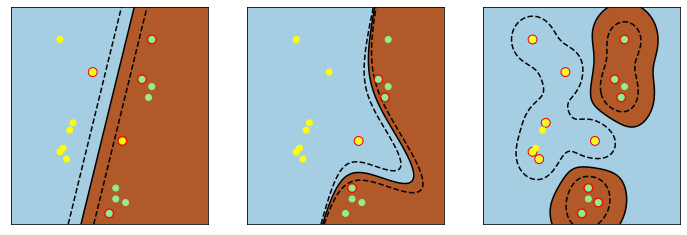

In [22]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
for fignum, kernel in enumerate(["linear", "poly", "rbf"]):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)

    plt.subplot(1, 3, fignum+1)
    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="r",
    )
    colors=np.array(['yellow', 'lightgreen'])
    plt.scatter(X[:, 0], X[:, 1], c=colors[Y], zorder=10, cmap=plt.cm.Paired)

    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.xlim(x_min, x_max);plt.ylim(y_min, y_max)
    plt.xticks(());plt.yticks(())   